In [45]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib as plt 
from matplotlib.pyplot import boxplot
from sklearn.linear_model import LogisticRegression 

In [46]:
current_directory = os.getcwd()
print(current_directory)

/Users/anishpotti/Desktop/Python for Health Analytics  


In [47]:
new_dictionary_path = r'C:/Users/anishpotti/Desktop/Python for Health Analytics' 
updated_dir = os.getcwd()
print (updated_dir)

/Users/anishpotti/Desktop/Python for Health Analytics  


In [48]:
filepath = 'Week14Assignment.txt'
df = pd.read_csv(filepath)
print(df.columns)

Index(['PatientID', ' Readmission', ' StaffSatisfaction',
       ' CleanlinessSatisfaction', ' FoodSatisfaction', ' ComfortSatisfaction',
       ' CommunicationSatisfaction'],
      dtype='object')


In [49]:
# calculating statistics 
num_readmitted = np.sum(df[' Readmission'])
satisfaction_staff = np.mean(df[' StaffSatisfaction'])
satisfaction_cleanliness = np.mean(df[' CleanlinessSatisfaction'])
satisfaction_food = np.mean(df[' FoodSatisfaction'])
satisfaction_comfort = np.mean(df[' ComfortSatisfaction'])
satisfaction_communication = np.mean(df[' CommunicationSatisfaction'])

In [50]:
# Printing out descriptive statistics 
print(f"Number of patients readmitted: {num_readmitted}.")
print(f"Average staff satisfaction: {satisfaction_staff}.")
print(f"Average cleanliness satisfaction: {satisfaction_cleanliness}.")
print(f"Average food satisfaction: {satisfaction_food}.")
print(f"Average comfort satisfaction: {satisfaction_comfort}.")
print(f"Average communication satisfaction: {satisfaction_communication}.")


Number of patients readmitted: 15.
Average staff satisfaction: 3.5.
Average cleanliness satisfaction: 3.6.
Average food satisfaction: 3.533333333333333.
Average comfort satisfaction: 3.7333333333333334.
Average communication satisfaction: 3.7.


{'whiskers': [<matplotlib.lines.Line2D at 0x145d0ad50>,
 'caps': [<matplotlib.lines.Line2D at 0x145cc2390>,
 'boxes': [<matplotlib.lines.Line2D at 0x145d14910>],
 'medians': [<matplotlib.lines.Line2D at 0x145cc0b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x145ce6a50>],
 'means': []}

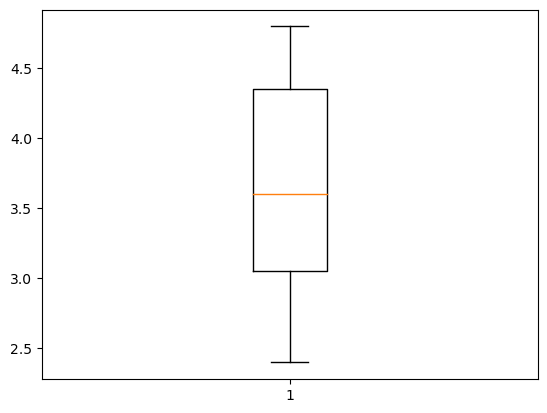

In [53]:
#Calculate overall satisfaction 
df['OverallSatisfaction'] = df[[' StaffSatisfaction', ' CleanlinessSatisfaction', 
                                      ' FoodSatisfaction', ' ComfortSatisfaction', 
                                      ' CommunicationSatisfaction']].mean(axis=1)
boxplot(df['OverallSatisfaction'], showfliers=True)                                  

In [54]:
#Logistic Regression 
X = df['OverallSatisfaction'].values.reshape(-1,1)
Y = df[' Readmission']

log_reg = LogisticRegression().fit(X,Y)

In [57]:
#Correlation results 
correlation_coefficient = log_reg.coef_[0][0]

if correlation_coefficient > 0:
    print("Logistic regression results indicated a:")
    if correlation_coefficient > 0.5:
        print("Moderate correlation")
    elif correlation_coefficient > 0.7: 
        print("Strong correlation")
    else: 
        print("Weak correlation")
else: 
    print("Logistic regression results indicated: ")
    print("No correlation")
            
print(f"The correlation coefficient was {correlation_coefficient}")   

Logistic regression results indicated a:
Weak correlation
The correlation coefficient was 0.33622781827987325


(2.0, 5.0)

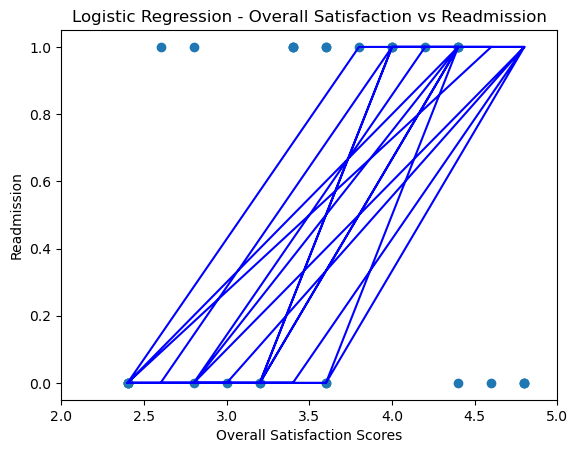

In [58]:
# plot the data 
plt.pyplot.scatter(X, Y)
plt.pyplot.xlabel('Overall Satisfaction Scores')
plt.pyplot.ylabel('Readmission')
plt.pyplot.title('Logistic Regression - Overall Satisfaction vs Readmission')
plt.pyplot.plot(X, log_reg.predict(X), color = 'blue')
plt.pyplot.xlim(2, 5)